In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import MLP, Ensemble, FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,  # type: ignore
                     header=None)  # type: ignore
X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2].reshape(-1, 1)

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y).ravel()

X.shape, y.shape

((506, 12), (506,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Initialize standard models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}


In [5]:
# Initialize custom models
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
epochs = 1000

# models["Custom MLP"] = MLP(input_dim, hidden_dim, output_dim,
#                            learning_rate=learning_rate, epochs=epochs)

# num_trees_input = 10
# models["FONN1"] = FONN1(input_dim, hidden_dim, output_dim, num_trees_input,
#                         learning_rate=learning_rate, epochs=epochs)
# models["Tree-based Predictions (FONN1)"] = models["FONN1"].trees

# num_trees_hidden = 10
# models["FONN2"] = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden,
#                         learning_rate=learning_rate, epochs=epochs)
# models["Tree-based Predictions (FONN2)"] = models["FONN2"].trees

# models["TREENN1"] = TREENN1(input_dim, hidden_dim, output_dim,
#                             learning_rate=learning_rate, epochs=epochs)
# models["Tree-based Predictions (TREENN1)"] = models["TREENN1"].trees

# models["TREENN2"] = TREENN2(input_dim, hidden_dim, output_dim,
#                             learning_rate=learning_rate, epochs=epochs)
# models["Tree-based Predictions (TREENN2)"] = models["TREENN2"].trees

# models["Ensemble of 10 Trees"] = Ensemble(10)

In [6]:
# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,R² Score,MAE,MSE,Train Time (s),Comp Time (s)
Linear Regression,0.629049,0.384294,0.322239,0.028587,0.000528
Ridge Regression,0.628946,0.383917,0.322328,0.005894,0.000155
Lasso Regression,-0.023341,0.680870,0.888958,0.001076,0.000104
ElasticNet Regression,0.264906,0.555322,0.638563,0.000446,0.000072
Bayesian Ridge Regression,0.628346,0.381953,0.322850,0.002001,0.000080
ARD Regression,0.624496,0.384624,0.326193,0.003114,0.000074
SGD Regressor,0.607993,0.384143,0.340529,0.000540,0.000056
Passive Aggressive Regressor,0.377765,0.530672,0.540524,0.000362,0.000053
Support Vector Regression,0.813869,0.241213,0.161689,0.009098,0.001080
MLP Regressor,0.817757,0.240056,0.158311,0.126229,0.000132


In [7]:
# # Get and print tree importances
# tree_importances = models["FONN2"].trees.get_tree_importances()

In [8]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
batch_size = 64

param_grid = {
    'learning_rate': [1e-6, 1e-5, 1e-4, 1e-3],
    'epochs': [1000, 5000, 10000, 50000, 100000]
}

mlp = MLP(input_dim, hidden_dim, output_dim,
          batch_size=batch_size)
search = HalvingGridSearchCV(mlp, param_grid=param_grid, random_state=42)
search.fit(X_train, y_train)
search.best_score_, search.best_params_

(0.740896134786168, {'epochs': 50000, 'learning_rate': 0.0001})

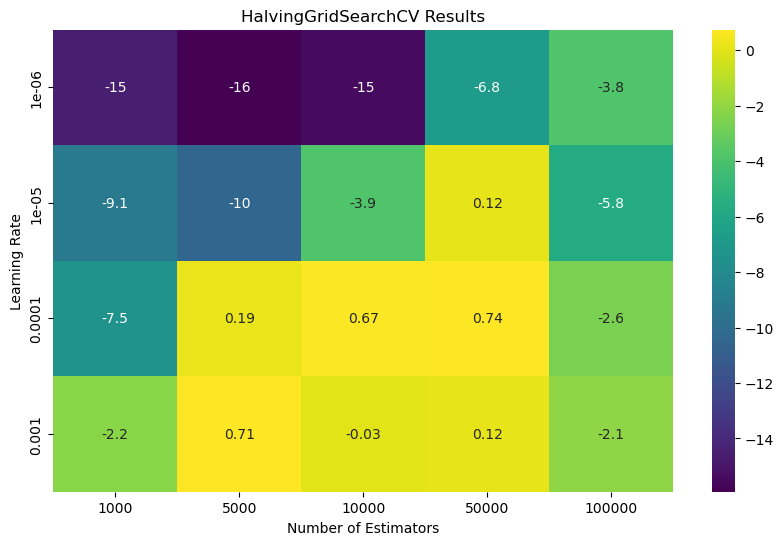

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert cv_results_ to a DataFrame
results = pd.DataFrame(search.cv_results_)

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = results.sort_values("iter").pivot_table(
            index="param_learning_rate",
            columns="param_epochs",
            values="mean_test_score",
            aggfunc="last",
        )

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('HalvingGridSearchCV Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.show()


In [10]:
results

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_learning_rate,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,44,0.159492,0.002014,0.000257,0.000010,1000,0.000001,"{'epochs': 1000, 'learning_rate': 1e-06}",-38.737042,...,-14.542537,12.335509,28,-6.670061,-5.722278,-10.249592,-8.774136,-10.186720,-8.320557,1.837643
1,0,44,0.157713,0.002195,0.000250,0.000010,1000,0.00001,"{'epochs': 1000, 'learning_rate': 1e-05}",-35.002776,...,-9.146265,13.144473,26,-14.248516,-0.393487,-3.298270,-1.293350,-18.138112,-7.474347,7.285440
2,0,44,0.161987,0.000867,0.000261,0.000015,1000,0.0001,"{'epochs': 1000, 'learning_rate': 0.0001}",-12.907058,...,-7.516273,6.340722,25,-4.801410,-9.322347,-2.280527,-1.186886,-0.113221,-3.540878,3.283075
3,0,44,0.160200,0.003276,0.000264,0.000015,1000,0.001,"{'epochs': 1000, 'learning_rate': 0.001}",-6.261899,...,-2.245989,2.249552,19,0.930702,0.972079,0.969128,0.963159,0.941848,0.955383,0.016251
4,0,44,0.797862,0.012762,0.000253,0.000010,5000,0.000001,"{'epochs': 5000, 'learning_rate': 1e-06}",-47.657273,...,-15.921108,18.932617,30,-5.439794,-19.966374,-1.885946,-3.046341,-3.599605,-6.787612,6.688546
5,0,44,0.803893,0.012013,0.000254,0.000013,5000,0.00001,"{'epochs': 5000, 'learning_rate': 1e-05}",-36.936847,...,-10.392273,13.304462,27,-5.068860,-2.338965,-3.546192,-0.887066,-2.432703,-2.854757,1.392574
6,0,44,0.816391,0.013670,0.000269,0.000023,5000,0.0001,"{'epochs': 5000, 'learning_rate': 0.0001}",-1.507131,...,-0.607206,0.830691,12,0.851536,0.857867,0.783884,0.897742,0.872858,0.852777,0.037944
7,0,44,0.810249,0.006947,0.000256,0.000017,5000,0.001,"{'epochs': 5000, 'learning_rate': 0.001}",-8.409885,...,-1.757057,3.367968,15,0.998342,0.994275,0.997731,0.998559,0.998874,0.997556,0.001683
8,0,44,1.631907,0.010808,0.000249,0.000014,10000,0.000001,"{'epochs': 10000, 'learning_rate': 1e-06}",-51.894758,...,-15.413195,18.850957,29,-4.871064,-2.995868,-1.142421,-10.376196,-11.625538,-6.202217,4.110686
9,0,44,1.616271,0.011510,0.000240,0.000002,10000,0.00001,"{'epochs': 10000, 'learning_rate': 1e-05}",-8.328584,...,-3.859567,2.561593,22,-0.042808,-0.828999,0.135950,-1.670861,-5.023247,-1.485993,1.881035
